In [8]:
# continuing on from yesterday's work. 
# import the imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import calendar


# load some data
data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    low_memory=False,
    na_values=['?', 'nan']
)

In [9]:
# view the data 
display(data.head())
data.info()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [10]:
# columns are capitalised, date and time is in object and should be combined to be datetime
data.columns = data.columns.str.lower()
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%d/%m/%Y %H:%M:%S')
data.set_index('datetime', inplace=True)
data.drop(columns=['date', 'time'], inplace=True)


In [11]:
# check for missing values
print(data[data.isnull().any(axis=1)].index.to_series().diff().value_counts().head())
display(data[data.isnull().any(axis=1)])
print(f"\nBeginning and end date: {data.index.min()} to {data.index.max()}")

datetime
0 days 00:01:00     25908
33 days 06:29:00        5
8 days 22:44:00         1
15 days 08:27:00        1
13 days 22:37:00        1
Name: count, dtype: int64


,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Beginning and end date: 2006-12-16 17:24:00 to 2010-11-26 21:02:00


In [12]:
print(data.index.min(), data.index.max())
data.index.to_series().diff().value_counts().head()

2006-12-16 17:24:00 2010-11-26 21:02:00


datetime
0 days 00:01:00    2075258
Name: count, dtype: int64

In [13]:
# We can see there are swathes of missing data, fully grouped together. On the bright side, we can remove it all and the wholedata set will still be intact.
df = data.dropna(how='all')

# verify the data is now clean
print(df.isna().sum().sum())

0


In [14]:
# data looks good - let's visualise it
df.sample(3)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
datetime,,,,,,,
2007-12-01 05:55:00,0.218,0.000,242.53,1.0,0.0,0.0,0.0
2007-05-18 00:26:00,0.590,0.086,239.38,2.6,0.0,0.0,0.0
2010-06-02 08:53:00,1.478,0.294,239.32,6.2,0.0,2.0,18.0


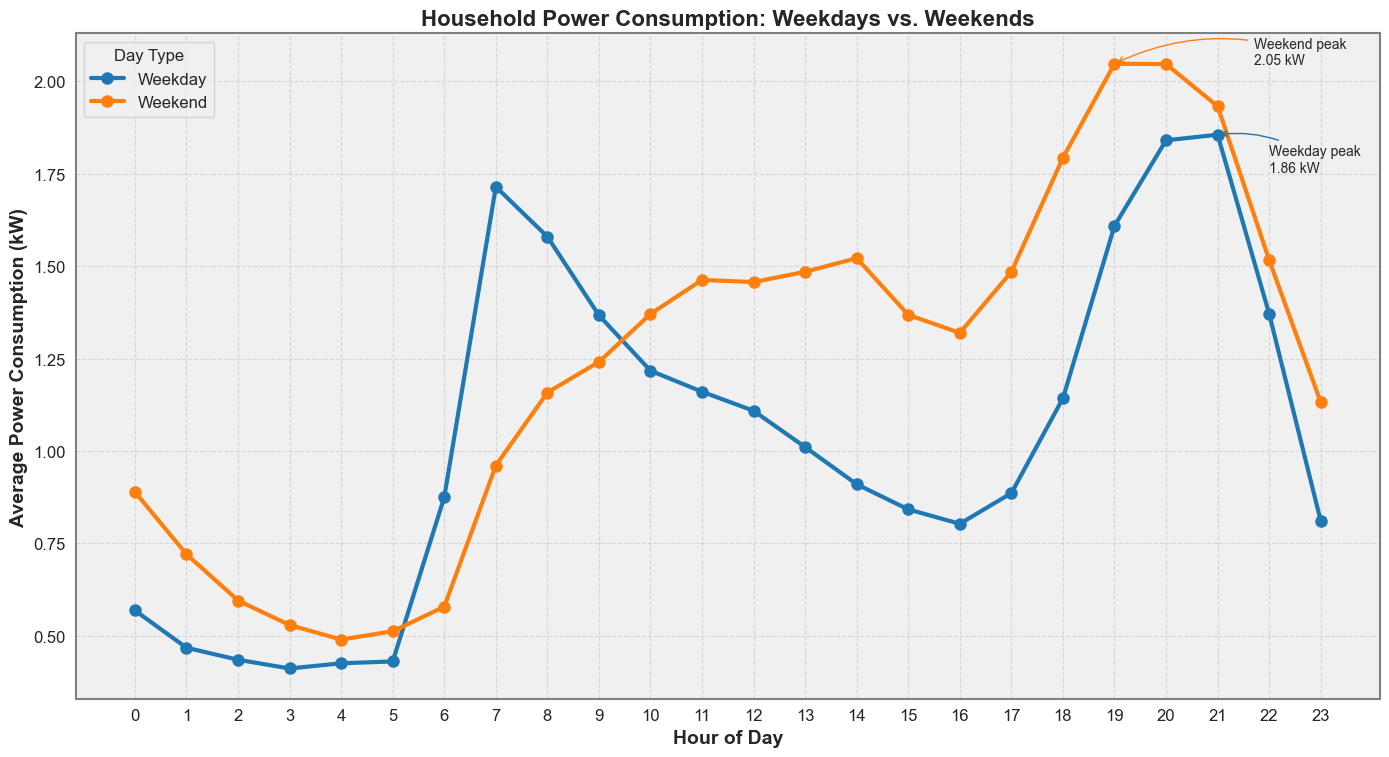

In [38]:
# build the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid", {"axes.facecolor": "#f0f0f0"})

# Group by hour and weekend flag
hourly_usage = df.groupby(['hour', 'is_weekend'])['global_active_power'].mean().unstack()

# Create the line plot with enhanced styling
ax = hourly_usage.plot(
    kind='line',
    marker='o',
    markersize=8,
    linewidth=3,
    color=['#1f77b4', '#ff7f0e'],
    ax=plt.gca()
)

# Add annotations for key insights
max_weekday = hourly_usage[False].max()
max_weekday_hour = hourly_usage[False].idxmax()
max_weekend = hourly_usage[True].max()
max_weekend_hour = hourly_usage[True].idxmax()

# Annotate weekday peak
plt.annotate(f'Weekday peak\n{max_weekday:.2f} kW',
             xy=(max_weekday_hour, max_weekday),
             xytext=(max_weekday_hour+1, max_weekday-0.1),
             arrowprops=dict(arrowstyle='->',
                             color='#1f77b4',
                             connectionstyle='arc3,rad=.2'))

# Annotate weekend peak
plt.annotate(f'Weekend peak\n{max_weekend:.2f} kW',
             xy=(max_weekend_hour, max_weekend),
             xytext=(max_weekend_hour+2.7, max_weekend),
             arrowprops=dict(arrowstyle='->',
                             color='#ff7f0e',
                             connectionstyle='arc3,rad=.2'))

# Enhance the plot
plt.title('Household Power Consumption: Weekdays vs. Weekends', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=14, fontweight='bold')
plt.ylabel('Average Power Consumption (kW)', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Weekday', 'Weekend'], title='Day Type', fontsize=12, title_fontsize=12)

# Add grey border around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('gray')
    spine.set_linewidth(1.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Weekday vs Weekend Power Consumption: Uncovering Household Habits

This visualization reveals fascinating differences in how electricity is used during weekdays compared to weekends. The patterns tell us a compelling story about the household's daily routines!

**What's amazing about this visualization:**
- The weekend curve (orange) shows a clear shift to later hours - people are sleeping in and staying up later when they don't have work
- The weekday pattern shows a distinctive double-peak structure (morning and evening) with a midday dip, strongly suggesting the home is vacant during typical work hours
- The evening peak consumption is actually higher on weekdays than weekends - possibly due to compressed evening activities (cooking, laundry, entertainment) when time is more limited

These patterns give us incredible insight into the household's lifestyle and schedule without any direct observation. Simply through electricity consumption data, we can accurately detect occupancy patterns and daily routines!

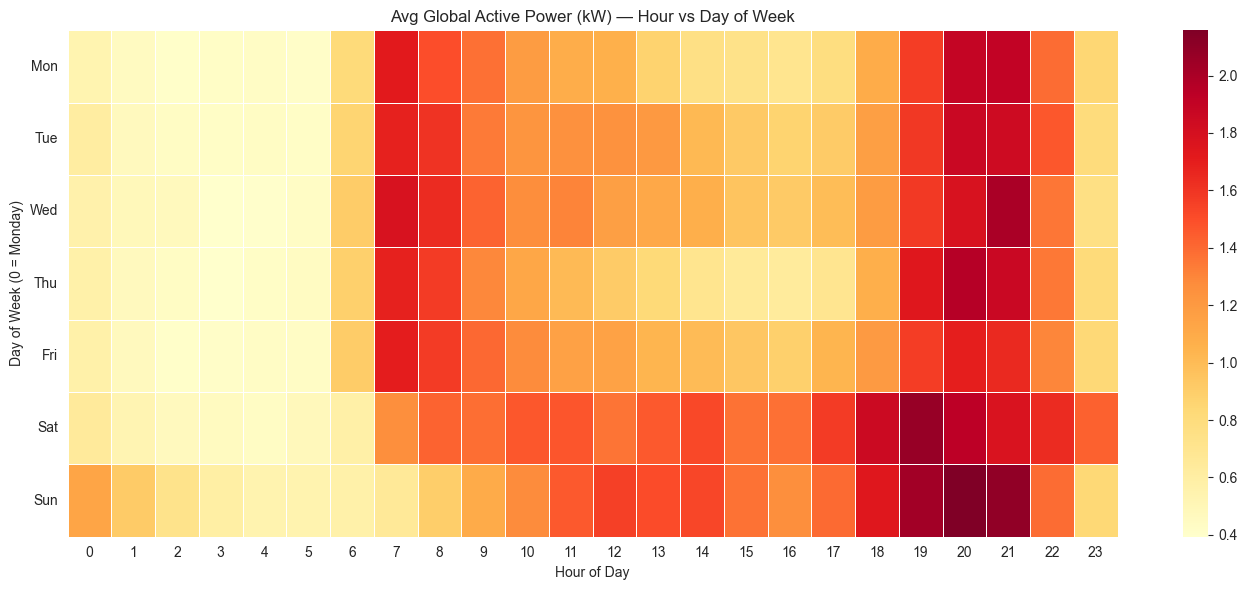

In [23]:
# Add helper columns
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # 0=Mon, 6=Sun

# Pivot table: average kW by (day, hour)
pivot = df.pivot_table(
    index='day_of_week', 
    columns='hour', 
    values='global_active_power', 
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.5, annot=False)
plt.title('Avg Global Active Power (kW) — Hour vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0 = Monday)')
plt.yticks(ticks=[0.5 + i for i in range(7)], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()


## Power Consumption Heatmap: The Weekly Energy Fingerprint

This heatmap visualization provides a stunning birds-eye view of power consumption patterns across both hours of the day and days of the week. The intensity of colors creates a distinctive "energy fingerprint" unique to this household.

**What makes this visualization particularly revealing:**
- The stark contrast between weekend mornings (Saturday-Sunday) and weekday mornings immediately jumps out - confirming different wake-up times
- Evening usage patterns (5-10pm) form a consistent band of high consumption across all days, but with subtle variations in timing and intensity
- The consistency of patterns across weekdays suggests regular, habitual behavior - this household follows a predictable routine
- The mid-afternoon reduction in consumption on weekdays provides strong evidence of an empty house during work hours

What's especially powerful about this visualization is how it condenses an entire week's worth of household behavior into a single, intuitive image. The patterns we see here could help optimize energy usage or even detect anomalies in household behavior!

## Key Insights from Power Consumption Analysis

These visualizations demonstrate the remarkable analytical power of household electricity data. With just simple power measurements, we can infer detailed information about household behavior and patterns.

**The most significant findings:**
- Weekday vs weekend patterns clearly indicate a household with regular work/school schedule
- The home is likely unoccupied during weekday business hours (9am-5pm)
- Residents wake up approximately 2 hours later on weekends than weekdays
- Evening activities appear more compressed and energy-intensive on weekdays

Beyond just understanding this specific household, these patterns highlight how energy consumption data can serve as a non-intrusive way to detect lifestyle patterns, optimize energy usage, and potentially identify unexpected changes in behavior that might indicate problems (such as illness or security issues).

The next step in this analysis could be to examine seasonal variations in these patterns or to compare different households to identify demographic differences in energy usage behavior.